In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x = df.iloc[:,1].values
y = df.iloc[:,2].values

In [5]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [7]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (8,)
train_label :  (8,)
test_data :  (2,)
test_label :  (2,)


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [12]:
X = sc_X.fit_transform(x.reshape(-1, 1))

In [13]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [15]:
Y = sc_Y.fit_transform(y.reshape(-1, 1))

In [17]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [18]:
from sklearn.svm import SVR
model = SVR(kernel="rbf")

In [19]:
model.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [20]:
y_pred = model.predict(sc_X.fit_transform(np.array([[6.5]])))

In [21]:
y_pred

array([-0.41686141])

In [24]:
y_pred2 = sc_X.inverse_transform(y_pred.reshape(-1, 1))

In [25]:
y_pred2

array([[6.08313859]])

In [26]:
model.score(X,Y)

0.7516001070620798

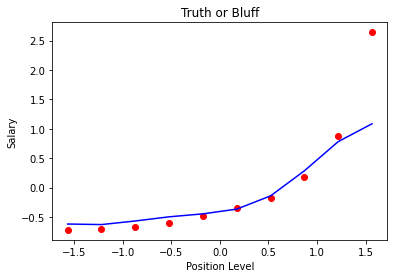

In [33]:
plt.scatter(X,Y,c="red")
plt.plot(X,model.predict(X),c="blue")
plt.title("Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()